A entropia e o ganho de informação são as bases matemáticas para escolher a melhor divisão sendo que o algortimo fará a divisão sempre na classe que apresentar o maior "ganho de informação".
As árvores aleatórias são muito sucetíveis a overfiting, uma forma de tentar corrigir isso é a criação de florestas aleatórias, onde são criadas várias árvores de devisão e o output é a média de todas as árvores.

Em uma árvore de decisão temos:
* Nós: dividem a árvore por um valor de um certo atributo.
* Ramos: saídas de um nó.
* Raiz: nó que faz a primeira divisão.
* Folhas: nó final, que toma a decisão

# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn           as sns
import pandas            as pd
import numpy             as np

from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import classification_report, confusion_matrix
from sklearn.ensemble        import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('data/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


# Data Exploratory

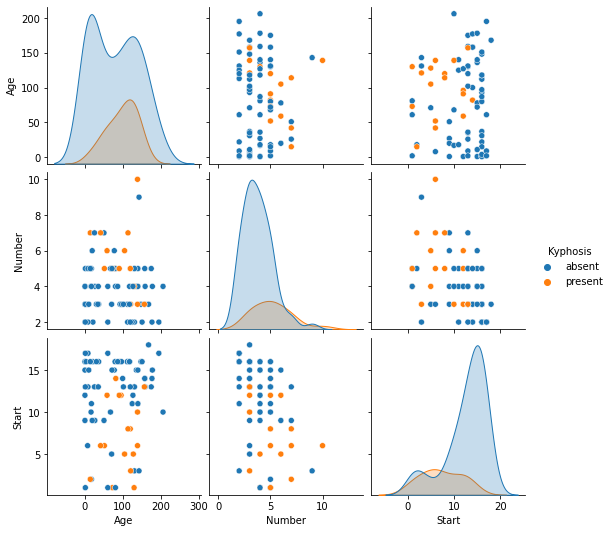

In [4]:
sns.pairplot(df, hue = 'Kyphosis');

# Data Preparation

In [5]:
x = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

## Decision Tree

In [7]:
dtree = DecisionTreeClassifier()

In [8]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
pred = dtree.predict(x_test)

In [10]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.87      0.95      0.91        21
     present       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25



In [11]:
print(confusion_matrix(y_test, pred))

[[20  1]
 [ 3  1]]


## Random Forest

In [12]:
rfc = RandomForestClassifier(n_estimators = 200)

In [13]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [14]:
rfc_pred = rfc.predict(x_test)

In [15]:
print(classification_report(y_test, rfc_pred))
print('\n')
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.88      1.00      0.93        21
     present       1.00      0.25      0.40         4

    accuracy                           0.88        25
   macro avg       0.94      0.62      0.67        25
weighted avg       0.90      0.88      0.85        25



[[21  0]
 [ 3  1]]


## Practice

Para este projeto, estaremos explorando dados disponíveis publicamente de [LendingClub.com](www.lendingclub.com). Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta. Vamos tentar criar um modelo que ajude a prever isso.

O clube de empréstimo teve um [ano muito interessante em 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), então vamos verificar alguns de seus dados e ter em mente o contexto. Esses dados são de antes mesmo de serem públicos.

Utilizaremos os dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra. Você pode baixar os dados de [aqui](https://www.lendingclub.com/info/download-data.action) ou apenas usar o csv já fornecido. Recomenda-se que você use o csv fornecido, uma vez que foi limpo dos valores de NA.

Aqui estão o que as colunas representam:
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito da LendingClub.com e 0 caso contrário.
* purpose: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* int.rate: a taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados por LendingClub.com para serem mais arriscados recebem taxas de juros mais elevadas.
* installment: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O log natural da renda anual auto-relatada do mutuário.
* dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* fico: a pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.
* revol.bal: Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* revol.util: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: número de consultas do mutuário por credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).

In [16]:
df = pd.read_csv('data/loan_data.csv')
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Data Exploration

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [18]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


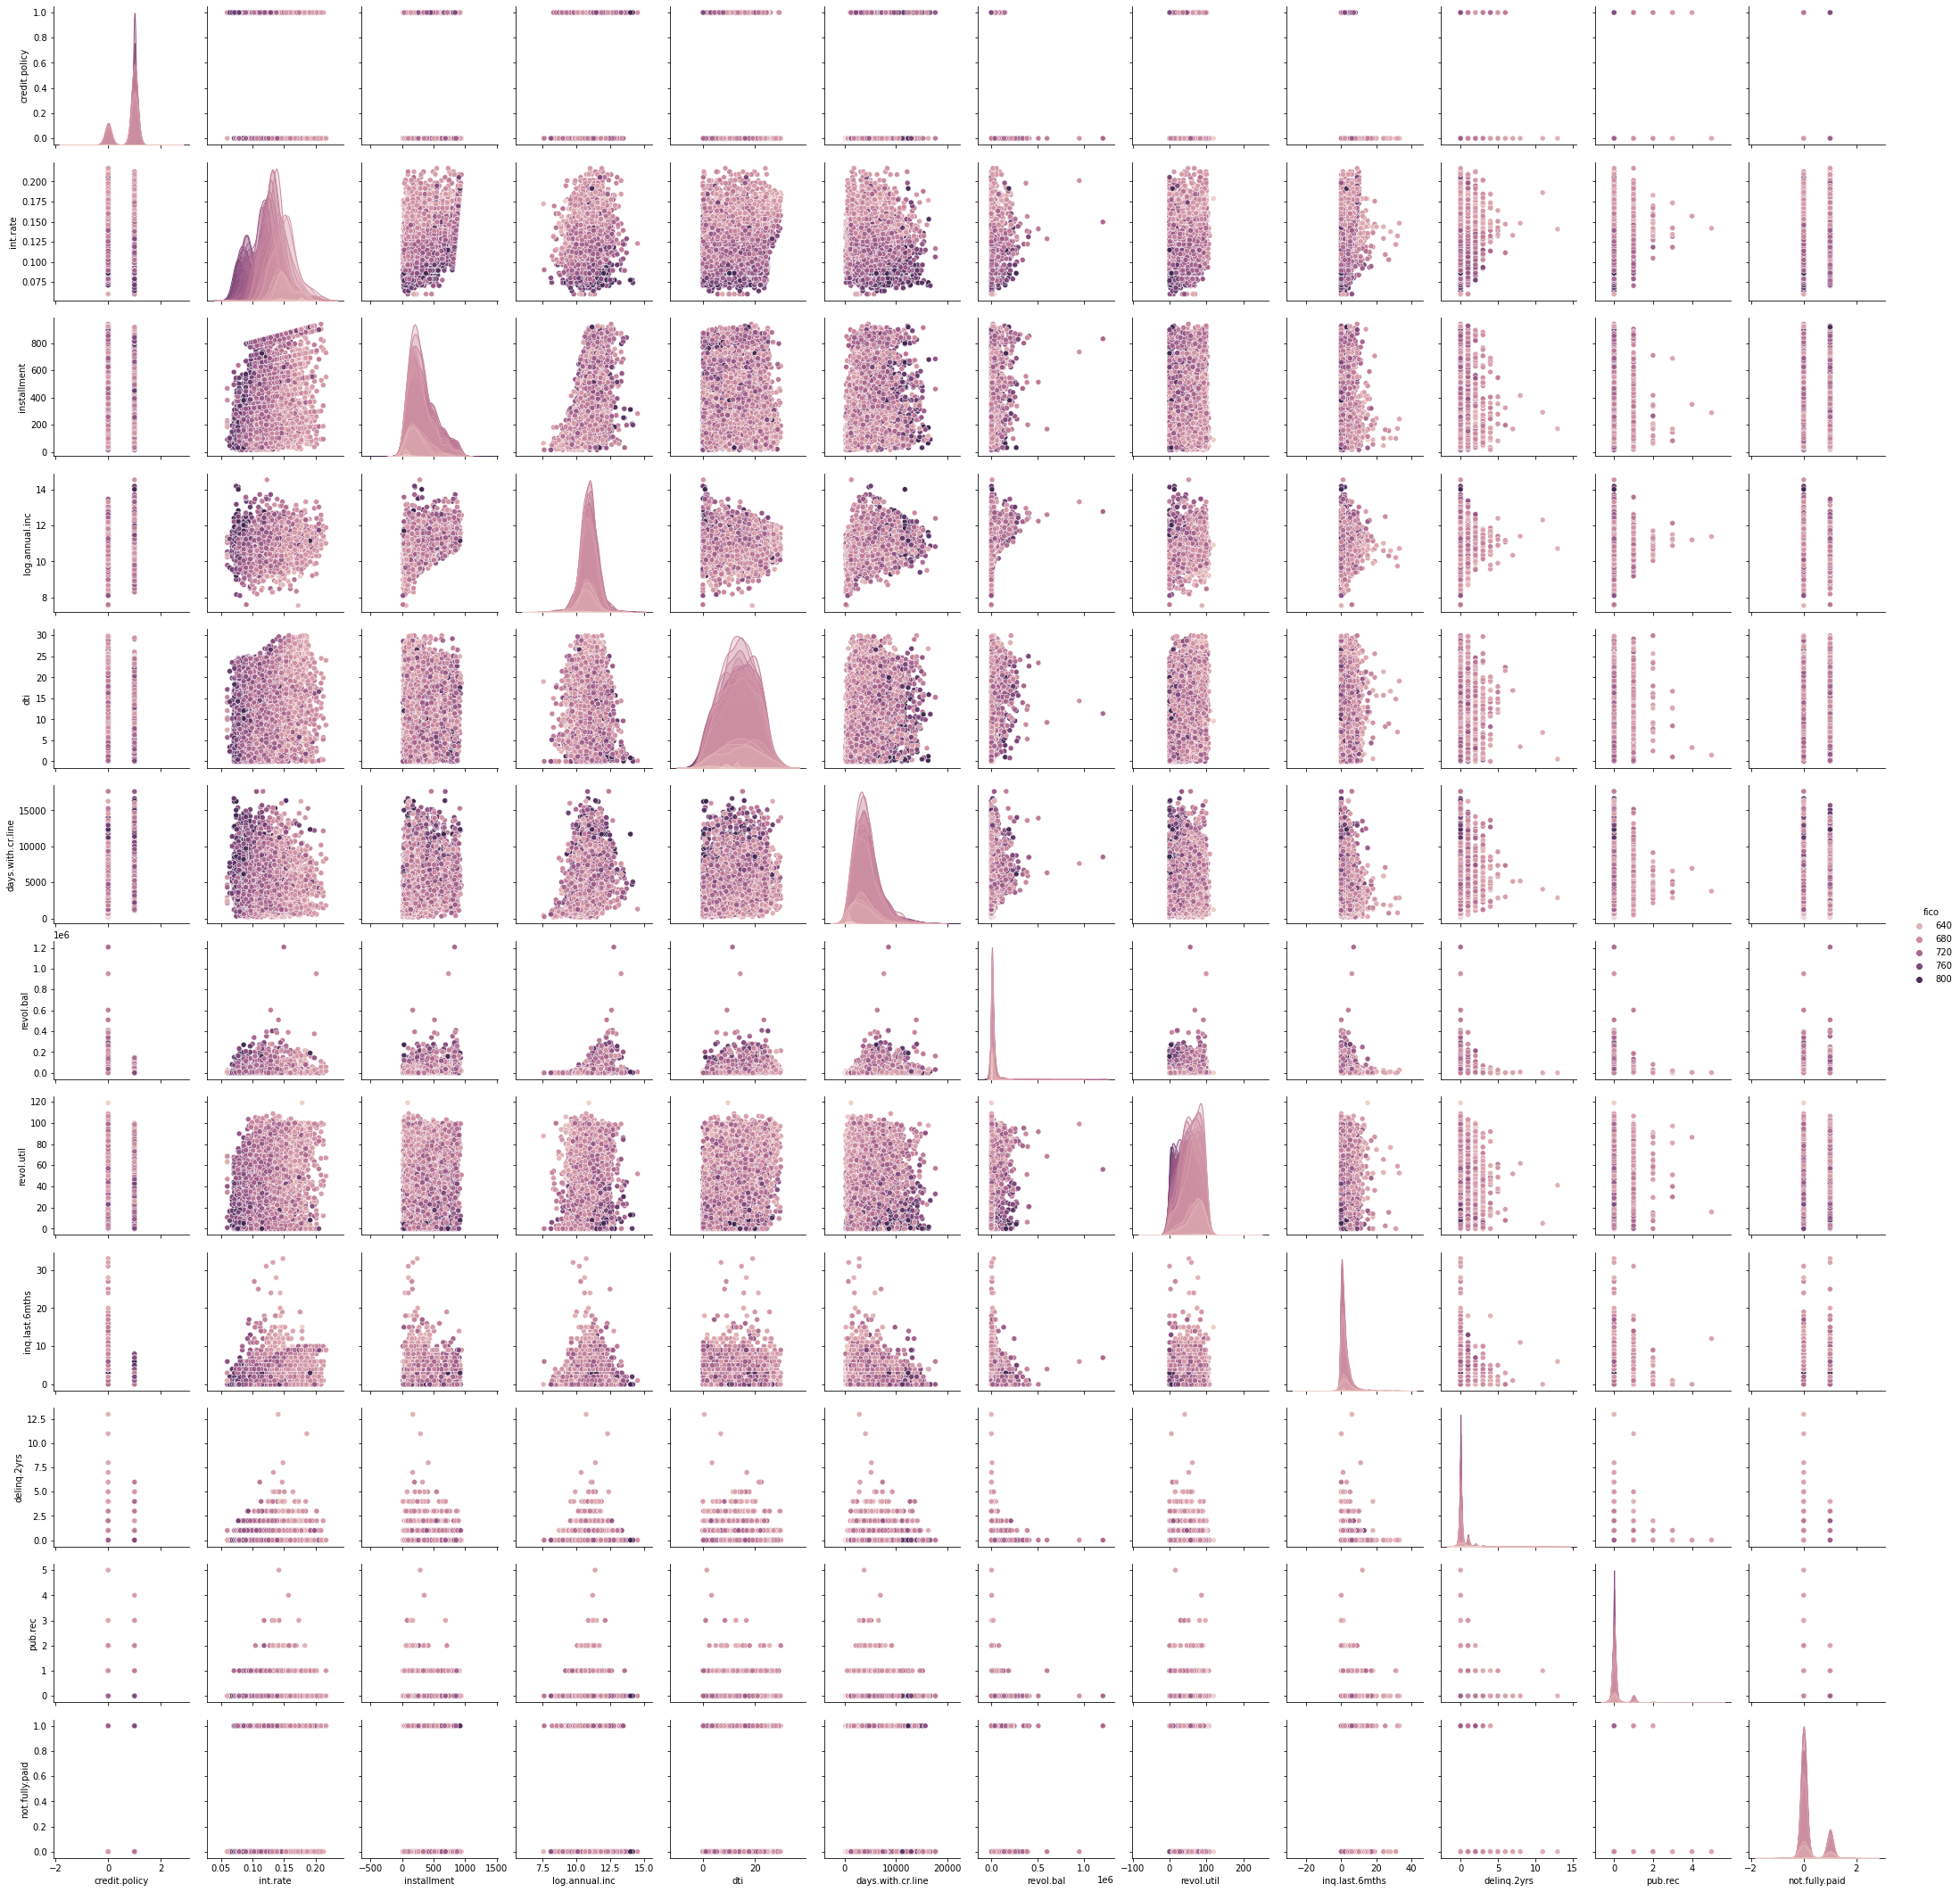

In [20]:
sns.pairplot(df, hue = 'fico');

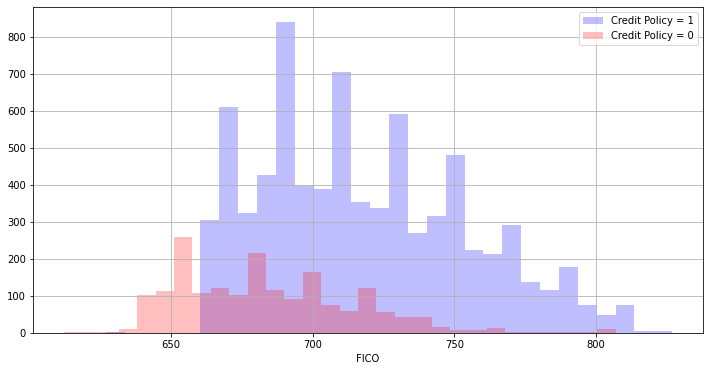

In [21]:
plt.figure(figsize=(12,6))
df[df['credit.policy']==1]['fico'].hist(alpha = 0.25, color = 'blue', bins = 30, label = 'Credit Policy = 1')
df[df['credit.policy']==0]['fico'].hist(alpha = 0.25, color = 'red', bins = 30, label = 'Credit Policy = 0')
plt.legend()
plt.xlabel('FICO');

Pessoas que aderem a Política de Crédito do LeandingClub demonstram ter um score mais alto.

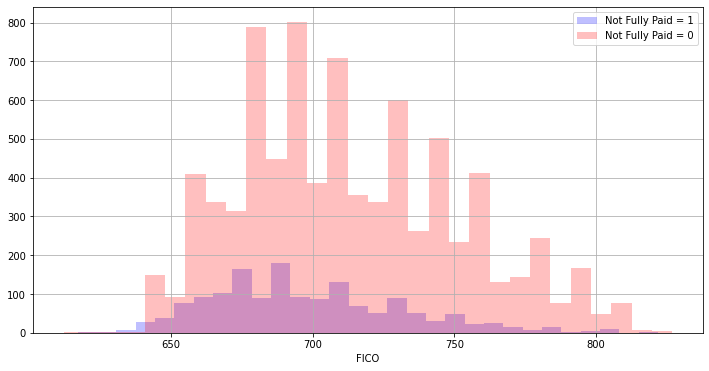

In [22]:
plt.figure(figsize=(12,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha = 0.25, color = 'blue', bins = 30, label = 'Not Fully Paid = 1')
df[df['not.fully.paid']==0]['fico'].hist(alpha = 0.25, color = 'red', bins = 30, label = 'Not Fully Paid = 0')
plt.legend()
plt.xlabel('FICO');

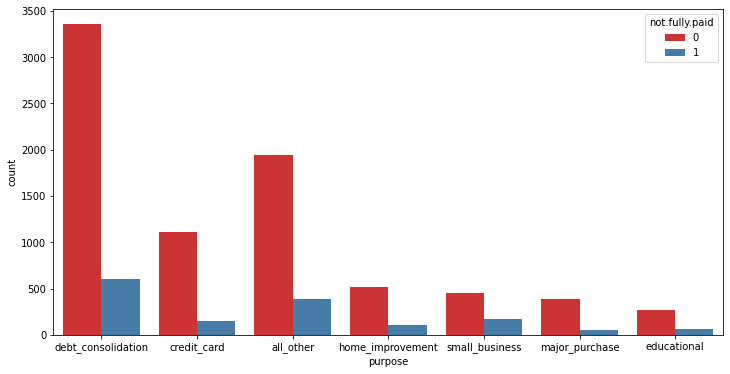

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = df, palette = 'Set1');

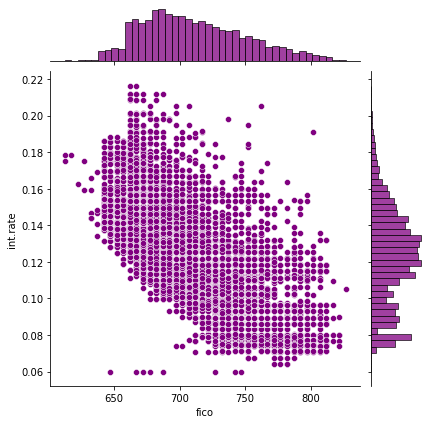

In [24]:
sns.jointplot(x = 'fico', y='int.rate', data = df, color = 'purple');

# A taxa de juros tende a aumentar conforme diminui a pontuação FICO

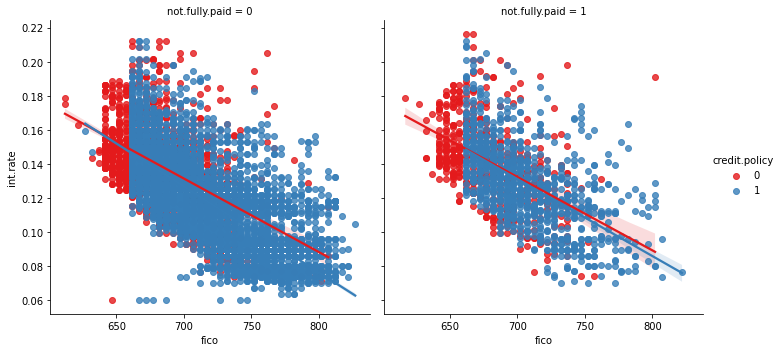

In [25]:
sns.lmplot(x='fico', y='int.rate', data=df, hue = 'credit.policy', col ='not.fully.paid', palette = 'Set1');

# A princípio não ha grande diferença entre as pessoas que pagaram e as que não pagaram

In [27]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [28]:
# A variável purpose é uma variável categóriga por isso se faz necessário dummyzalá antes de montar o modelo.
cat_feats = ['purpose']
final_data = pd.get_dummies(df, columns = cat_feats, drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Training a Decision Tree Model

In [31]:
x = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
pred = dtree.predict(x_test)

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2428
           1       0.21      0.25      0.23       446

    accuracy                           0.74      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.74      0.75      2874



In [35]:
print(confusion_matrix(y_test, pred))

[[2007  421]
 [ 335  111]]


### Training a Random Forest Model

In [37]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [38]:
pred = rfc.predict(x_test)

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2428
           1       0.43      0.02      0.04       446

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



In [40]:
print(confusion_matrix(y_test, pred))

[[2416   12]
 [ 437    9]]
